# Machine Learning models on the chess dataset
In this part I am going to try various prediction algorithm based on different feature.

## Predicting the winner of the game
I will try to predict the outcome of the game, winner and victory status combined, based on few features which are 'turns', 'black_rating', 'white_rating', 'opening_code' and 'opening-play'.
I a m going to use a Random Forest Algorithm. This algorithm is perfect for predicting something categorical.

In [4]:
#Importing modules and librairies

import pandas as pd
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings

warnings.filterwarnings('ignore')

df_games = pd.read_csv("CSV_Output/games_cleaned.csv")
#Setting target features
df_games['target'] = df_games['winner'].astype(str) + '-' + df_games['victory_status'].astype(str)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19113 entries, 0 to 19112
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19113 non-null  object 
 1   rated           19113 non-null  bool   
 2   created_at      19113 non-null  float64
 3   last_move_at    19113 non-null  float64
 4   turns           19113 non-null  int64  
 5   victory_status  19113 non-null  object 
 6   winner          19113 non-null  object 
 7   increment_code  19113 non-null  object 
 8   white_id        19113 non-null  object 
 9   white_rating    19113 non-null  int64  
 10  black_id        19113 non-null  object 
 11  black_rating    19113 non-null  int64  
 12  moves           19113 non-null  object 
 13  opening_eco     19113 non-null  object 
 14  opening_name    19113 non-null  object 
 15  opening_ply     19113 non-null  int64  
 16  target          19113 non-null  object 
dtypes: bool(1), float64(2), int64(4

### Preparing the dataset for training
The first we need to do is encoding the categorical features in order to make it easier fot our model to processing them. In the next cell I print the number of unique categories in each categorical feature in order to decide wich encoding method we can use.

In [5]:
#Redunce the dataset to the features we want to use
dataset = df_games[['turns', 'target', 'white_rating', 'black_rating', 'opening_eco', 'opening_ply']]
print(dataset['target'].unique())
print(dataset['opening_eco'].unique())
len(dataset['opening_eco'].unique())

['white-outoftime' 'black-resign' 'white-mate' 'draw-draw' 'white-resign'
 'black-mate' 'black-outoftime' 'draw-outoftime']
['D10' 'B00' 'C20' 'B27' 'D00' 'C50' 'B01' 'A00' 'C02' 'C00' 'C57' 'C41'
 'C55' 'A40' 'B20' 'A25' 'B21' 'D01' 'C45' 'D06' 'B52' 'D20' 'B06' 'A45'
 'B77' 'A21' 'B70' 'B23' 'B76' 'C21' 'A80' 'A20' 'A04' 'C26' 'C44' 'E10'
 'A41' 'C01' 'D02' 'A10' 'C18' 'A47' 'C10' 'D80' 'D30' 'D41' 'B03' 'B29'
 'B02' 'B13' 'B57' 'E20' 'E11' 'C40' 'C11' 'C28' 'A46' 'B30' 'A56' 'C65'
 'B90' 'B50' 'B51' 'E00' 'C70' 'B11' 'B22' 'B40' 'B31' 'B18' 'C61' 'C78'
 'B10' 'C42' 'D07' 'B32' 'C68' 'A22' 'C46' 'A02' 'C58' 'A03' 'B54' 'B12'
 'D03' 'D31' 'C69' 'A31' 'D46' 'C34' 'C48' 'C47' 'B24' 'C67' 'C60' 'E61'
 'C53' 'C23' 'B96' 'C54' 'A05' 'D92' 'A49' 'C22' 'C37' 'A09' 'A01' 'C88'
 'B34' 'C03' 'C33' 'A48' 'A11' 'A81' 'B05' 'B53' 'B08' 'C30' 'A15' 'B43'
 'C07' 'A34' 'D08' 'A30' 'A08' 'A13' 'D11' 'D50' 'A73' 'D35' 'D21' 'C64'
 'C15' 'B09' 'A52' 'E90' 'A06' 'B15' 'D17' 'A43' 'A65' 'B33' 'A67' 'C62'


365

#### Encoding the categorical features
Here we encode the two categorical features, the target and the opening code feature.
For the target feature I use Label encoding because it is an ordered feauture and it is not necessary to increase the dimensionality of the dataset for that feature.
For the opening code feature I use Binry encoding because there is a high number of unique category (365) but we want to reduce dimensionality compare to one-hot encoding.

In [6]:
le = LabelEncoder()
dataset['target'] = le.fit_transform(dataset['target'])
labels = list(le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7]))
labels_correspondence = {key : value for key, value in zip(range(8), labels)} 
print(labels_correspondence)
encoder_opening = ce.BinaryEncoder(cols = ['opening_eco'])
encoded_data = encoder_opening.fit_transform(dataset)
encoded_data

{0: 'black-mate', 1: 'black-outoftime', 2: 'black-resign', 3: 'draw-draw', 4: 'draw-outoftime', 5: 'white-mate', 6: 'white-outoftime', 7: 'white-resign'}


,turns,target,white_rating,black_rating,opening_eco_0,opening_eco_1,opening_eco_2,opening_eco_3,opening_eco_4,opening_eco_5,opening_eco_6,opening_eco_7,opening_eco_8,opening_ply
0,13,6,1500,1191,0,0,0,0,0,0,0,0,1,5
1,16,2,1322,1261,0,0,0,0,0,0,0,1,0,4
2,61,5,1496,1500,0,0,0,0,0,0,0,1,1,3
3,5,3,1250,1002,0,0,0,0,0,0,1,0,0,4
4,33,7,1520,1423,0,0,0,0,0,0,1,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19108,24,7,1691,1220,0,0,0,0,1,1,1,1,1,2
19109,82,0,1233,1196,0,0,0,1,0,0,1,0,1,2
19110,35,5,1219,1286,0,0,0,0,0,0,1,0,1,3
19111,109,7,1360,1227,0,1,0,0,1,1,0,1,1,4


### Random forest training and testing
In the next cell I use a Random Forest algorithm as a model to predict the winner based on the opening move, player ratings and the number of turns of the game.

In [7]:
y = encoded_data['target']
x = encoded_data.drop(['target'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

### Analysing the prediction
Based on the prediction we made we can check multiple factors on our test such as the accuracy.
We can also show the confusion matrix to see in image the accuracy of our model.

Here we can see that our model have an accuracy of 40% which is very low and for some outcome the accuracy is less than 10% !

              precision    recall  f1-score   support

           0       0.28      0.26      0.27       527
           1       0.08      0.02      0.03       177
           2       0.38      0.47      0.42      1000
           3       0.09      0.03      0.05       166
           4       0.00      0.00      0.00         9
           5       0.29      0.22      0.25       651
           6       0.08      0.02      0.03       169
           7       0.41      0.54      0.46      1124

    accuracy                           0.36      3823
   macro avg       0.20      0.19      0.19      3823
weighted avg       0.32      0.36      0.33      3823

{0: 'black-mate', 1: 'black-outoftime', 2: 'black-resign', 3: 'draw-draw', 4: 'draw-outoftime', 5: 'white-mate', 6: 'white-outoftime', 7: 'white-resign'}


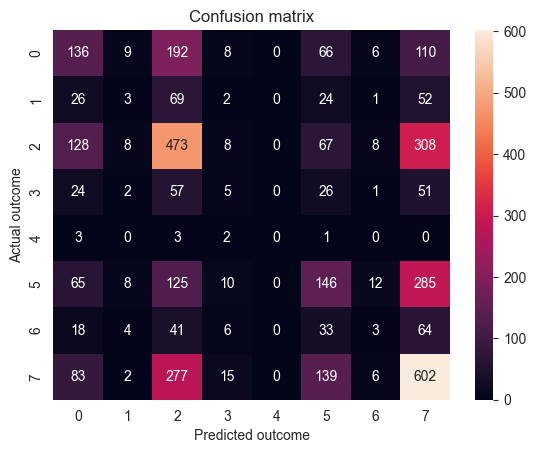

In [8]:
cm = confusion_matrix(y_test, y_pred)
heatmap = sns.heatmap(cm, annot=True, fmt='d')
heatmap.set_title('Confusion matrix')
heatmap.set_xlabel('Predicted outcome')
heatmap.set_ylabel('Actual outcome')
print(classification_report(y_test, y_pred))
print(labels_correspondence)

To understand the low accuracy we can plot the importances rating of the features used by the Random Forest algorithm. Here we can see that the importances rating of the encoded opening codes columns are not the same, some are more commonly used by the model and this is not exactly what we want.

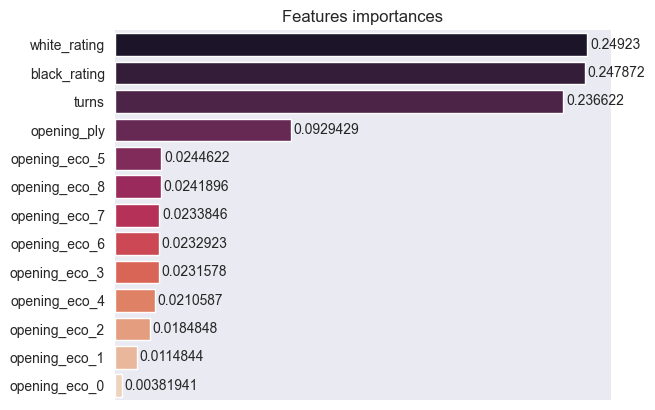

In [9]:
features_df = pd.DataFrame({'features' : rfc.feature_names_in_, 'importances' : rfc.feature_importances_})

features_df_sorted = features_df.sort_values(by='importances', ascending=False)

plot = sns.barplot(data = features_df_sorted, x='importances', y = 'features', palette = 'rocket')
sns.despine(bottom = True, left = True)
plot.set_title('Features importances')
plot.set(xlabel = None)
plot.set(ylabel = None)
plot.set(xticks = [])
for value in plot.containers:
    plot.bar_label(value, padding = 2)